In [ ]:
! pip install sentence_transformers

In [ ]:
! pip install tensorflow_hub

In [ ]:
! pip install tensorflow_text

In [33]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import pandas as pd
import random
import os

In [6]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [7]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
preprocessed_text = bert_preprocess(text_input)
emb = bert_encoder(preprocessed_text)

dense = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')
out = dense(emb['pooled_output'])

model = tf.keras.Model(inputs=[text_input], outputs = [out])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

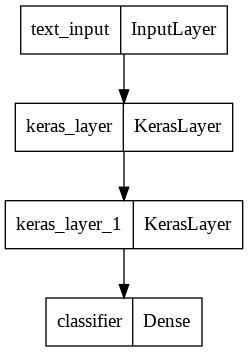

In [8]:
tf.keras.utils.plot_model(model)

In [9]:
true = pd.read_csv("/content/drive/MyDrive/News Articles/Datasets/Medium/DatasetMediumCleaned.csv")
true = true[:50000]
true.drop_duplicates(inplace=True)

In [10]:
true.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
true.shape

In [12]:
x = []
for i in range(50000) :
  x.append(1)

In [13]:
true['label'] = x

In [ ]:
true.head(2)

In [15]:
fake = pd.read_csv("/content/drive/MyDrive/News Articles/Datasets/Medium/dataset_for_model_negative.csv")
fake.drop_duplicates(inplace=True)

In [ ]:
fake.columns

In [ ]:
true.columns

In [18]:
fake.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
fake.rename(columns={'0' : 'label'}, inplace=True)

In [ ]:
fake.head(2)

In [ ]:
fake.shape

In [22]:
true.to_csv("/content/drive/MyDrive/News Articles/Datasets/Medium/true_50k.csv")

In [23]:
df = pd.concat([true, fake])

In [ ]:
df.head(3)

In [36]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df)

In [46]:
shuffled_df.drop_duplicates(inplace=True)

In [50]:
shuffled_df = shuffled_df.dropna()

In [51]:
shuffled_df

,content,label
39674,more than 5 cr covid19 vaccine doses administe...,1
14053,president of india shri ram nath kovind to vir...,1
19862,the andaman islands are an archipelago far awa...,0
45243,both the indian and german governments appreci...,1
10187,shri piyush goyal reviews monsoon preparation ...,0
...,...,...
40212,downgrading of sericulture training institute ...,0
4786,the success of the abhiyaan can be attributed ...,1
8572,the recovery of 38945 patients in the last 24 ...,1
48050,episodically accreting young stars decrease th...,0


In [52]:
shuffled_df.to_csv("/content/drive/MyDrive/News Articles/Datasets/Medium/dataset50k.csv")

In [53]:
# count1 = 0
# count2 = 0
# for i in shuffled_df.label :
#   if i==1 :
#     count1+=1
#   else :
#     count2+=1
# print(count1,count2)

46568 45725


In [54]:
x = shuffled_df.content
y = shuffled_df.label

In [55]:
X = []
for i in x :
  X.append(str(i))

In [56]:
x = np.array(X)
y = np.array(y)

In [57]:
model.fit(x,y, epochs=15)

Epoch 1/15
2885/2885 [==============================] - 935s 324ms/step - loss: 0.4774 - accuracy: 0.7623
Epoch 2/15
2885/2885 [==============================] - 938s 325ms/step - loss: 0.4735 - accuracy: 0.7655
Epoch 3/15
2885/2885 [==============================] - 938s 325ms/step - loss: 0.4707 - accuracy: 0.7661
Epoch 4/15
2885/2885 [==============================] - 939s 326ms/step - loss: 0.4692 - accuracy: 0.7671
Epoch 5/15
2885/2885 [==============================] - 935s 324ms/step - loss: 0.4675 - accuracy: 0.7674
Epoch 6/15
2885/2885 [==============================] - 936s 324ms/step - loss: 0.4658 - accuracy: 0.7691
Epoch 7/15
2885/2885 [==============================] - 936s 325ms/step - loss: 0.4639 - accuracy: 0.7696
Epoch 8/15
2885/2885 [==============================] - 938s 325ms/step - loss: 0.4621 - accuracy: 0.7715
Epoch 9/15
2885/2885 [==============================] - 938s 325ms/step - loss: 0.4620 - accuracy: 0.7704
Epoch 10/15
2885/2885 [=======================

In [61]:
model_save_path = "/content/drive/MyDrive/Models"
model_save_path = os.path.join(model_save_path, "classifier.h5")

In [62]:
tf.keras.models.save_model(model, model_save_path)

In [60]:
while True :
  pass

KeyboardInterrupt: ignored